In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from create_data_byreliability import GetData as gd

In [1]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolderName = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFolder = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/NewNetworkFigs/'

In [61]:
def plot_graph_factors_bytrack_iterated_csv(ax, filename, column_name, fucked=False):
    
    df_highrel = pd.read_csv(filename)
    df_highrel = df_highrel.rename(columns={df_highrel.columns[0]:'BinnedLocation'})
    df_highrel = df_highrel.drop([0, 1])
    df_highrel = df_highrel.dropna()
    
    mean_by_loc = pd.DataFrame()
    mean_by_loc['Location'] = df_highrel['BinnedLocation'].astype(int)
    if column_name == 'Degree':
        if fucked:
            norm_mean = df_highrel['Degree.1'].astype(float)/df_highrel['Degree'].astype(int)
        else:
            norm_mean = df_highrel['Degree'].astype(float)/df_highrel['Degree.2'].astype(int)
        mean_by_loc['Mean'] = norm_mean
    else:
        if fucked:
            norm_mean = df_highrel['%s.1'%column_name].astype(float)
        else:
            norm_mean = df_highrel[column_name].astype(float)
        mean_by_loc['Mean'] = norm_mean
    
    g  = mean_by_loc.groupby(by='Location').agg(['mean', 'sem']) 
    ax.plot(np.arange(len(g)), g['Mean']['mean'])
    ax.fill_between(np.arange(len(g)), g['Mean']['mean']-g['Mean']['sem'], 
                    g['Mean']['mean']+g['Mean']['sem'], alpha=0.5)
    return g

In [71]:
def plot_graph_factors_byanimal_iterated_csv(filename1, column_name, fucked=False):
    df_highrel = pd.read_csv(filename1)
    df_highrel = df_highrel.rename(columns={df_highrel.columns[0]:'AnimalName'})
    df_highrel = df_highrel.drop([0, 1])

    mean_by_loc = pd.DataFrame()
    mean_by_loc['AnimalName'] = df_highrel['AnimalName'].astype(str)
    if column_name == 'Degree':
        if fucked:
            norm_mean = df_highrel['Degree.1'].astype(float)/df_highrel['Degree'].astype(int)
        else:
            norm_mean = df_highrel['Degree'].astype(float)/df_highrel['Degree.2'].astype(int)
        mean_by_loc['Mean'] = norm_mean
    else:
        if fucked:
            norm_mean = df_highrel['%s.1'%column_name].astype(float)
        else:
            norm_mean = df_highrel[column_name].astype(float)
        mean_by_loc['Mean'] = norm_mean
    g  = mean_by_loc.groupby(by='AnimalName').mean()
    return g

## Task1_Task2

In [7]:
na = gd(DirectoryName, CombinedFolderName)

In [9]:
taskstocompare = 'Task2'
xx, by_location_highrel, by_animal_highrel, numcells = na.get_adjacency_matrix(taskstocompare, basetask='Task1',
                                   reliability_type='High', subsample=False,
                                   SaveFolder=os.path.join(SaveFolder, 'Highreliability'))

NR34
Analysing..99 cells
CFC17
Analysing..145 cells
NR32
Analysing..67 cells
CFC16
Analysing..51 cells
CFC18
Analysing..171 cells


In [35]:
file1 = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Lowreliability/Task1_Task2/by_location_iterated.csv'

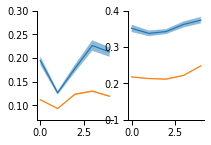

In [36]:
fs, ax = plt.subplots(1, 2)
na.plot_graph_bylocation_separate(ax[0], by_location_highrel, column_name='Degree')
na.plot_graph_bylocation_separate(ax[1], by_location_highrel, column_name='Clustering')

plot_graph_factors_bytrack_iterated_csv(ax[0], file1, column_name='Degree')
plot_graph_factors_bytrack_iterated_csv(ax[1], file1, column_name='Clustering')

ax[0].set_ylim((0.07, 0.3))
ax[1].set_ylim((0.1, 0.4))
sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bytrack_subsampledlowrelcells_Task1.pdf'), bbox_inches='tight')

In [37]:
file1 = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Lowreliability/Task1_Task2/by_animal_iterated.csv'

t=5.720, p=0.005
t=12.657, p=0.000


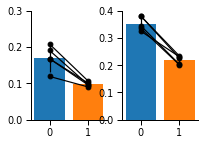

In [38]:
## By Animal
fs, ax = plt.subplots(1, 2)
a = plot_graph_factors_byanimal_iterated_csv(file1, column_name='Degree')
na.plot_factors_by_animal(ax[0], by_animal_highrel, a.reset_index()['Mean'], column_name='Degree', iterated=True)

a = plot_graph_factors_byanimal_iterated_csv(file1, column_name='Clustering')
na.plot_factors_by_animal(ax[1], by_animal_highrel, a.reset_index()['Mean'], column_name='Clustering', iterated=True)
ax[0].set_ylim((0, 0.3))
ax[1].set_ylim((0, 0.4))
sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_byanimal_subsampledlowrelcells_Task1.pdf'), bbox_inches='tight')

## Task3_Task4

In [62]:
taskstocompare = 'Task4'
xx, by_location_highrel_Task3, by_animal_highrel_Task3, numcells = na.get_adjacency_matrix(taskstocompare, basetask='Task3',
                                   reliability_type='High', subsample=False,
                                   SaveFolder=os.path.join(SaveFolder, 'Highreliability'))

NR34
Analysing..59 cells
CFC17
Analysing..79 cells
NR32
Analysing..18 cells
CFC16
Analysing..12 cells
CFC18
Analysing..101 cells


In [78]:
file1 = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Lowreliability/Task3_Task4/by_location_iterated.csv'

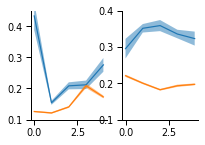

In [79]:
fs, ax = plt.subplots(1, 2)
na.plot_graph_bylocation_separate(ax[0], by_location_highrel_Task3, column_name='Degree')
na.plot_graph_bylocation_separate(ax[1], by_location_highrel_Task3, column_name='Clustering')

plot_graph_factors_bytrack_iterated_csv(ax[0], file1, column_name='Degree', fucked=True)
plot_graph_factors_bytrack_iterated_csv(ax[1], file1, column_name='Clustering', fucked=True)

ax[0].set_ylim((0.1, 0.45))
ax[1].set_ylim((0.1, 0.4))
sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bytrack_subsampledlowrelcells_Task3.pdf'), bbox_inches='tight')

In [80]:
file1 = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/Lowreliability/Task3_Task4/by_animal_iterated.csv'

t=3.843, p=0.018
t=7.604, p=0.002


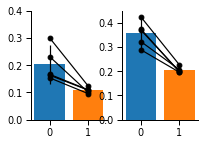

In [81]:
## By Animal
fs, ax = plt.subplots(1, 2)
a = plot_graph_factors_byanimal_iterated_csv(file1, column_name='Degree', fucked=True)
na.plot_factors_by_animal(ax[0], by_animal_highrel_Task3, a.reset_index()['Mean'], column_name='Degree', iterated=True)

a = plot_graph_factors_byanimal_iterated_csv(file1, column_name='Clustering', fucked=True)
na.plot_factors_by_animal(ax[1], by_animal_highrel_Task3, a.reset_index()['Mean'], column_name='Clustering', iterated=True)
ax[0].set_ylim((0, 0.4))
ax[1].set_ylim((0, 0.45))
sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_byanimal_subsampledlowrelcells_Task3.pdf'), bbox_inches='tight')